In [18]:
# import requests
# from IPython.core.display import HTML
# HTML(f"""
# <style>
# @import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
# </style>
# """)

# Polynomial models
<article class="message is-info">
  <div class="message-header">Overview</div>
  <div class="message-body">
  
  In this exercise you will implement a method to estimate the model parameters of single variate (single input) 2-nd and 3-rd order polynomials and use these models to predict a label for new datapoints. Next week you will extend this method to $n$-th order, single variate, polynomials in a fairly straightforward manner. 

  
  </div>
</article>

<article class="message is-danger">
  <div class="message-header">Important</div>
  <div class="message-body">

  Ensure that you have finished all of the tasks from the W3 in-class exercise
, as you will need them for the following tasks. 


  </div>
</article>

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#loading7">Task 1: Data preparation (data wrangling)</a>
            </li>
            <li>
            <a href="#loading8">Task 2: Constructing the design matrix</a>
            </li>
            <li>
            <a href="#loading9">Task 3: Inverting the design matrix</a>
            </li>
            <li>
            <a href="#loading10">Task 4: Plotting</a>
            </li>
            <li>
            <a href="#loading10130">Task 5: Making predictions</a>
            </li>
            <li>
            <a href="#loading12">Task 6: Load data</a>
            </li>
            <li>
            <a href="#loading11">Task 7: Third order polynomials</a>
            </li>
            <li>
            <a href="#loading13">Task 8: Plotting</a>
            </li>
            <li>
            <a href="#loading145">Task 9: Observe</a>
            </li>
            <li>
            <a href="#loading100">Task 10: Making predictions</a>
            </li>
            <li>
            <a href="#loading1030">Task 11: Observe</a>
            </li>
        </ul>
    </div>
</article>

## 2nd-order Polynomial model
A 2nd-order polynomial model, also known as a quadratic model, can be expressed as:

$$ y = w_0 + w_1 x + w_2 x^2 $$
This model assumes that the relationship between the input $x$ and the label $y$ is non-linear and quadratic. This way a "curved" relationship can be modelled which can capture patterns that a simple linear model might miss. 
By _fitting_ this model, the aim is to find (learn) the parameters $w_0$, $w_1$, and $w_2$ that minimize the difference between the predicted values and the actual data, providing a more flexible fit compared to a linear model.
<article class="message task"><a class="anchor" id="loading8"></a>
    <div class="message-header">
        <span>Task 1: Load data</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to load libraries and construct the datasets.



</div></article>



In [19]:
import numpy as np
import matplotlib.pyplot as plt

quadratic_dataset_1 = np.array([[1, 2], 
                                [2, 3], 
                                [3, 6]])

quadratic_dataset_2 = np.array([[9, 3], 
                                [7, 5], 
                                [1, 9]])

quadratic_dataset_3 = np.array([[8, 4], 
                                [10, 5], 
                                [3, 1]])

Throughout the next tasks, the aim is to construct the design matrix using the known variables, followed by learning the model parameters (solving) using the inverse of the design matrix. The subsequent tasks involve using the learnt model parameters to predict new unseen inputs and plotting the results.
<article class="message task"><a class="anchor" id="loading7"></a>
    <div class="message-header">
        <span>Task 2: Data preparation (data wrangling)</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. For each dataset identify which values correspond to inputs and which are the labels.
2. Complete the `separate_inputs_labels`
 function below. The function takes a dataset as input and returns the inputs as the `X_quadratic`
 matrix and the labels as the `y_quadratic`
 vector.



</div></article>



In [20]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.
    
    Parameters:
    dataset (numpy array): The dataset to be separated.
    
    Returns:
    X_quadratic (3x1 numpy array): The input matrix.
    y_quadratic (1x3 numpy array): The labels vector.
    """
    
    X_quadratic = dataset[:,0].reshape(-1,1)
    y_quadratic = dataset[:,1]
    
    return X_quadratic, y_quadratic

# Applying the function to each quadratic dataset
X1_quadratic, y1_quadratic = separate_inputs_labels(quadratic_dataset_1)
X2_quadratic, y2_quadratic = separate_inputs_labels(quadratic_dataset_2)
X3_quadratic, y3_quadratic = separate_inputs_labels(quadratic_dataset_3)

print("X1_quadratic: \n", X1_quadratic)
print("y1_quadratic: \n", y1_quadratic)

X1_quadratic: 
 [[1]
 [2]
 [3]]
y1_quadratic: 
 [2 3 6]


<article class="message task"><a class="anchor" id="loading8"></a>
    <div class="message-header">
        <span>Task 3: Constructing the design matrix</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Reuse the code from the W3 in-class exercise
:
1. For each data set construct the design matrix by adding a 2nd order polynomial term.
2. Print the results.



</div></article>



In [21]:
def construct_design_matrix(X):
    """
    Constructs a design matrix for a 2nd order polynomial model.
    
    Parameters:
    X (numpy array): Input matrix of shape (n, 1)
    
    Returns:
    X_design (numpy array): Design matrix of shape (n, 3)
    """
    x_squared = X ** 2
    x_linear = X
    ones = np.ones_like(X)
    X_design = np.hstack((x_squared, x_linear, ones))
    return X_design

# Assuming you've already separated inputs and labels:
X1_quadratic_design = construct_design_matrix(X1_quadratic)
X2_quadratic_design = construct_design_matrix(X2_quadratic)
X3_quadratic_design = construct_design_matrix(X3_quadratic)

# Print results
print("Design Matrix for Dataset 1:\n", X1_quadratic_design)
print("Design Matrix for Dataset 2:\n", X2_quadratic_design)
print("Design Matrix for Dataset 3:\n", X3_quadratic_design)


Design Matrix for Dataset 1:
 [[1 1 1]
 [4 2 1]
 [9 3 1]]
Design Matrix for Dataset 2:
 [[81  9  1]
 [49  7  1]
 [ 1  1  1]]
Design Matrix for Dataset 3:
 [[ 64   8   1]
 [100  10   1]
 [  9   3   1]]


<article class="message task"><a class="anchor" id="loading9"></a>
    <div class="message-header">
        <span>Task 4: Inverting the design matrix</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Compute the inverse of each design matrix.
2. Compute the model parameters (referenced as `weigths`
 in the cells below), then print the results.



</div></article>



In [22]:
# my approach:
X1_q_d_inv = np.linalg.inv(X1_quadratic_design)
weights1_quadratic = X1_q_d_inv @ y1_quadratic

X2_q_d_inv = np.linalg.inv(X2_quadratic_design)
weights2_quadratic = X2_q_d_inv @ y2_quadratic

X3_q_d_inv = np.linalg.inv(X3_quadratic_design)
weights3_quadratic = X3_q_d_inv @ y3_quadratic

print("Model parameters for Model 1:", weights1_quadratic)
print("Model parameters for Model 2:", weights2_quadratic)
print("Model parameters for Model 3:", weights3_quadratic)

Model parameters for Model 1: [ 1. -2.  3.]
Model parameters for Model 2: [-0.04166667 -0.33333333  9.375     ]
Model parameters for Model 3: [-0.01428571  0.75714286 -1.14285714]


In [23]:
def compute_weights(X_design, y):
    """
    Computes the model weights using the normal equation.
    
    Parameters:
    X_design (numpy array): Design matrix (n x 3)
    y (numpy array): Labels vector (n,)
    
    Returns:
    weights (numpy array): Model weights (3,)
    """
    XTX_inv = np.linalg.inv(X_design.T @ X_design)
    weights = XTX_inv @ X_design.T @ y
    return weights

weights1_quadratic = compute_weights(X1_quadratic_design, y1_quadratic)
weights2_quadratic = compute_weights(X2_quadratic_design, y2_quadratic)
weights3_quadratic = compute_weights(X3_quadratic_design, y3_quadratic)

# Print results
print("Model parameters for Dataset 1:", weights1_quadratic)
print("Model parameters for Dataset 2:", weights2_quadratic)
print("Model parameters for Dataset 3:", weights3_quadratic)


Model parameters for Dataset 1: [ 1. -2.  3.]
Model parameters for Dataset 2: [-0.04166667 -0.33333333  9.375     ]
Model parameters for Dataset 3: [-0.01428571  0.75714286 -1.14285714]


<article class="message task"><a class="anchor" id="loading10"></a>
    <div class="message-header">
        <span>Task 5: Plotting</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          <i class="bi bi-lightbulb-fill"></i>
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Use the `plot_quadratic_model`
 function to plot the results. 



</div></article>



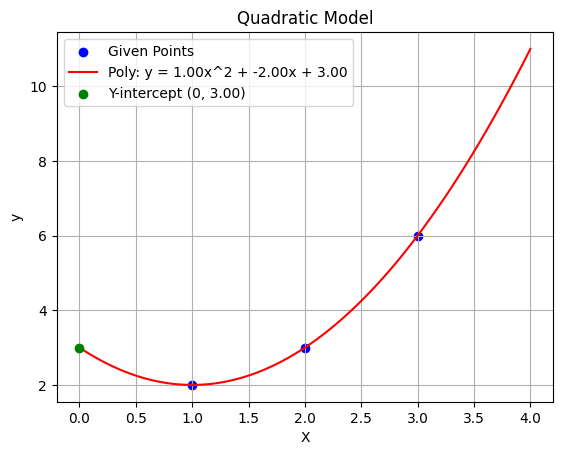

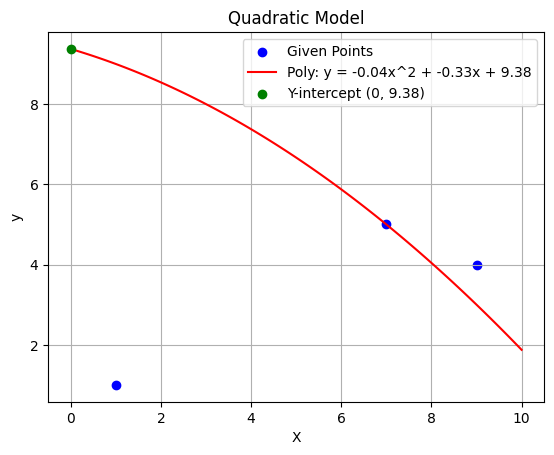

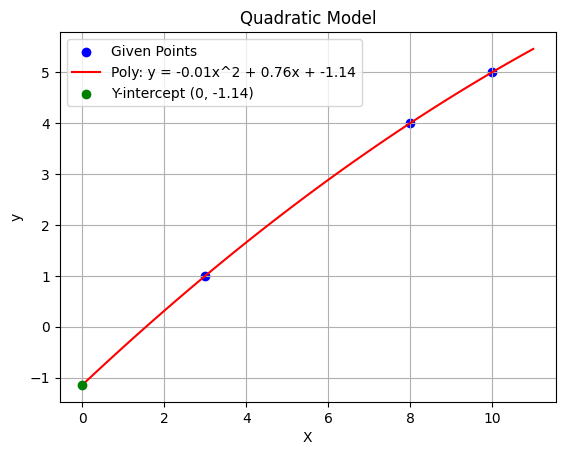

In [24]:
# Function to plot data points and fitted quadratic model
def plot_quadratic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    
    # Plot the fitted polynomial
    plt.plot(x_vals, 
             y_vals, 
             color='red', 
             label=f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + {weights[2]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[2], color='green', zorder=5, label=f'Y-intercept (0, {weights[2]:.2f})')
    
    # Add title and labels
    plt.title('Quadratic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_quadratic_model(X1_quadratic, y1_quadratic, weights1_quadratic)
plot_quadratic_model(X2_quadratic, y3_quadratic, weights2_quadratic)
plot_quadratic_model(X3_quadratic, y3_quadratic, weights3_quadratic)

<article class="message task"><a class="anchor" id="loading11"></a>
    <div class="message-header">
        <span>Task 6: Observe</span>
        <span class="has-text-right">
          
          
          <i class="bi bi-lightbulb-fill"></i>
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Visually inspect the plots and discuss how the model parameters influence the shape and position of the fitted curve. 
2. Compare the results of the polynomial model to the outcome of the linear model implemented in the in-class exercise.



</div></article>



In [ ]:
# Write your reflections here..
"""
the bias term w0 states where the model intersects with the y axis. because 0 + 0 + bias
w1 is the INITIAL slope at the intersection with y
w2 determines the change in slope. if positive -> up. if negative -> down.
"""

To make predictions with a polynomial model, you apply the polynomial equation to the new input using the estimated model parameters. The model then predicts the label (output) based on the learned model parameters and input values.
<article class="message task"><a class="anchor" id="loading10130"></a>
    <div class="message-header">
        <span>Task 7: Making predictions</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          <i class="bi bi-lightbulb-fill"></i>
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


The cell below contains an array of new inputs. Follow these steps to predict a label for the new input:
1. For each trained model, use the model parameters to predict a label for the new input. The model parameters for the different models should lead to different predictions. Store the predicted label as a separate variable. 
2. Plot the results using the `plot_quadratic_model_with_predictions`
 function. 
3. Compare the plots and the predicted labels obtained with the different models.
4. Extend the `new_inputs`
 array with the points `1.5`
 and `-1`
. Follow the same steps as above to obtain predicted labels for each input. 
5. Following the above steps should result in 3 predicted labels for each model. A total of 9 predicted values must be submitted as part of the **mandatory** activity on [Grasple](https://app.grasple.com/#/courses/10532/ci/734077/diagnoses/12887)




</div></article>



In [66]:
# New array of inputs for prediction, currently containing a single element
new_input = np.array([14, 1.5, -1])

def plot_quadratic_model_with_predictions(X, y, weights, new_input, predicted_labels):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted quadratic model
    x_vals = np.linspace(min(X.min(), new_input.min()), max(X.max(), new_input.max()), 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + '
        f'{weights[2]:.2f}'
    ))

    # Plot the new inputs and their predicted labels
    plt.scatter(new_input, predicted_labels, color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Quadratic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [67]:
new_input_design = construct_design_matrix(new_input.reshape(-1,1))
new_input = new_input.reshape(-1,1)
print(new_input_design)
print()
print(new_input)

[[196.    14.     1.  ]
 [  2.25   1.5    1.  ]
 [  1.    -1.     1.  ]]

[[14. ]
 [ 1.5]
 [-1. ]]


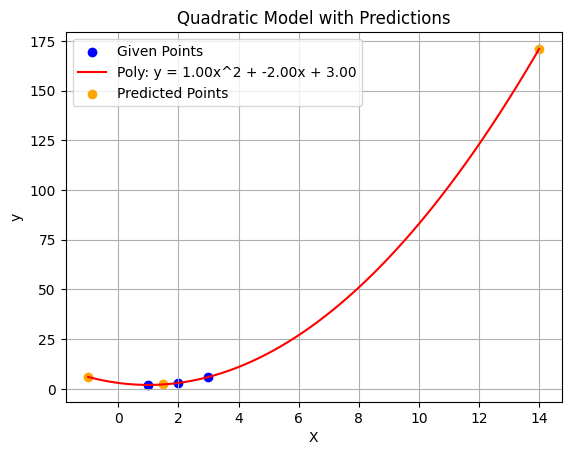

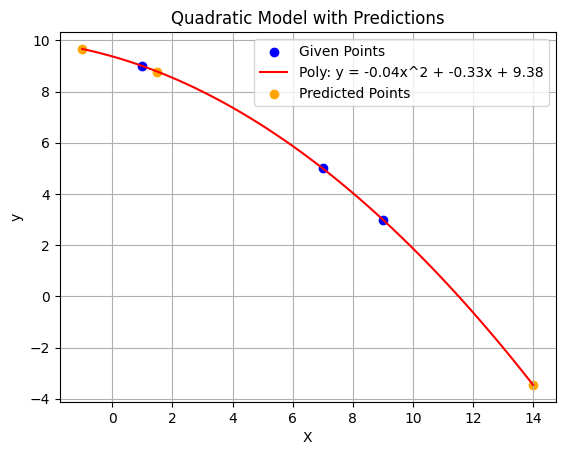

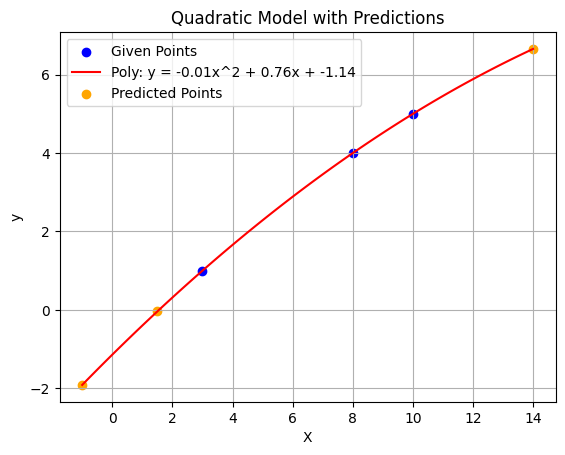

In [69]:
labels1_predicted = new_input_design @ weights1_quadratic
labels2_predicted = new_input_design @ weights2_quadratic
labels3_predicted = new_input_design @ weights3_quadratic
plot_quadratic_model_with_predictions(X1_quadratic, y1_quadratic, weights1_quadratic, new_input, labels1_predicted)
plot_quadratic_model_with_predictions(X2_quadratic, y2_quadratic, weights2_quadratic, new_input, labels2_predicted)
plot_quadratic_model_with_predictions(X3_quadratic, y3_quadratic, weights3_quadratic, new_input, labels3_predicted)

## 3rd-order Polynomial models
This exercise is about using third order polynomials to obtained increased flexibility by introducing a cubic term $x^3$.
A 3rd-order polynomial model is given by

$$ y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 $$
In the next tasks you will follow similar steps as with 1. and 2. order polynomial. This includes:
1. Preparing the dataset.
2. Constructing the design matrix.
3. Calculating the model weights.
4. Plotting the results.
5. Using the model to make predictions for new inputs.

<article class="message task"><a class="anchor" id="loading12"></a>
    <div class="message-header">
        <span>Task 8: Load data</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to construct a new dataset.



</div></article>

:


In [71]:
cubic_dataset = np.array([[7, 6], [5, 24], [8, 60], [1, 120]])
cubic_dataset

array([[  7,   6],
       [  5,  24],
       [  8,  60],
       [  1, 120]])

<article class="message task"><a class="anchor" id="loading11"></a>
    <div class="message-header">
        <span>Task 9: Third order polynomials</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. For each dataset identify which values correspond to inputs and which are the ground truth labels.
2. Create a $4 \times 1$ matrix called `X_cubic`
 that contain the inputs, and a vector called `y_cubic`
 containing the corresponding ground truth labels.
3. Create the design matrix, remember to add tthe higher order terms.
4. Calculate the inverse of the design matrix.
5. Follow the same procedure as previous to compute the model parameters.



</div></article>



In [74]:
X_cubic, y_cubic = separate_inputs_labels(cubic_dataset)
X_cubic, y_cubic

(array([[7],
        [5],
        [8],
        [1]]),
 array([  6,  24,  60, 120]))

In [76]:
def construct_design_matrix_cubic(X):
    """
    Constructs a design matrix for a 3rd order polynomial model.
    
    Parameters:
    X (numpy array): Input matrix of shape (n, 1)
    
    Returns:
    X_design (numpy array): Design matrix of shape (n, 3)
    """
    x_cubed = X ** 3
    x_squared = X ** 2
    x_linear = X
    ones = np.ones_like(X)
    X_design = np.hstack((x_cubed, x_squared, x_linear, ones))
    return X_design


X_cubic_design = construct_design_matrix_cubic(X_cubic)

# Print results
print("Design Matrix for the cubic Dataset:\n", X_cubic_design)

Design Matrix for the cubic Dataset:
 [[343  49   7   1]
 [125  25   5   1]
 [512  64   8   1]
 [  1   1   1   1]]


In [ ]:
# my approach:

# X_cubic_design_inv = np.linalg.inv(X_cubic_design)
# weights_cubic = X_cubic_design_inv @ y_cubic

array([  2.64285714, -31.85714286,  85.21428571,  64.        ])

In [84]:
# def compute_weights_cubic(X_design, y):
#     """
#     Computes the model weights using the normal equation.
    
#     Parameters:
#     X_design (numpy array): Design matrix (n x 4)
#     y (numpy array): Labels vector (n,)
    
#     Returns:
#     weights (numpy array): Model weights (4,)
#     """
#     XTX_inv = np.linalg.inv(X_design.T @ X_design)
#     weights = XTX_inv @ X_design.T @ y
#     return weights

weights_cubic = compute_weights(X_cubic_design, y_cubic)

# Print results
print("Model parameters for the cubic Dataset:", weights_cubic)

Model parameters for the cubic Dataset: [  2.64285714 -31.85714286  85.21428571  64.        ]


<article class="message task"><a class="anchor" id="loading13"></a>
    <div class="message-header">
        <span>Task 10: Plotting</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          <i class="bi bi-lightbulb-fill"></i>
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Use the `plot_cubic_model`
 function to plot the results.
2. Visually inspect the plots and discuss how the model parameters influence the shape and position of the fitted curve.



</div></article>



In [85]:
# Function to plot data points and fitted cubic model
def plot_cubic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    
    # Plot the fitted polynomial
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + '
        f'{weights[2]:.2f}x + {weights[3]:.2f}'
    ))
    
    # Plot the y-intercept
    plt.scatter(0, weights[3], color='green', zorder=5, label=f'Y-intercept (0, {weights[3]:.2f})')
    
    # Add title and labels
    plt.title('Cubic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim([-0.25, max(X) + 1])  # Ensure the x-axis starts from 0
    plt.show()

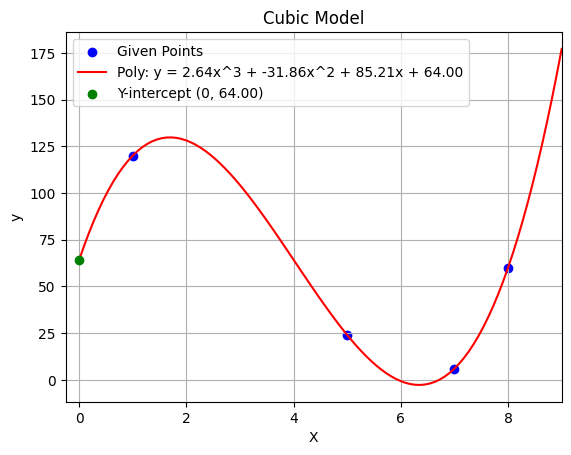

In [87]:
plot_cubic_model(X_cubic, y_cubic, weights_cubic)

<article class="message task"><a class="anchor" id="loading145"></a>
    <div class="message-header">
        <span>Task 11: Observe</span>
        <span class="has-text-right">
          
          
          <i class="bi bi-lightbulb-fill"></i>
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Compare the results of the 3rd order polynomial to the 1st and 2nd order models. Based on the plots, which model shows the best fit?



</div></article>



In [30]:
# Write your reflections here...

<article class="message task"><a class="anchor" id="loading100"></a>
    <div class="message-header">
        <span>Task 12: Making predictions</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i>
          
          <i class="bi bi-lightbulb-fill"></i>
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In this task, the learned 3rd order polynomial model is used to predict labels for the `new_inputs`
 array defined below.
1. Use the obtained cubic model parameters to predict labels for the new inputs. 
2. Plot the results using the `plot_cubic_model_with_predictions`
 function.



</div></article>



In [88]:
new_inputs = np.array([14, 1.5, -1])

# Function to plot data points, fitted cubic model, and predictions
def plot_cubic_model_with_predictions(X, y, weights, new_inputs, predicted_labels):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted cubic model
    x_vals = np.linspace(min(min(X), min(new_inputs)), max(max(X), max(new_inputs)), 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + '
        f'{weights[2]:.2f}x + {weights[3]:.2f}'
    ))

    # Plot the new inputs and their predicted labels
    plt.scatter(new_inputs, predicted_labels, color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Learned Cubic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [92]:
new_inputs_design = construct_design_matrix_cubic(new_inputs.reshape(-1,1))
new_inputs = new_inputs.reshape(-1,1)
print(new_inputs_design)
print()
print(new_inputs)

[[ 2.744e+03  1.960e+02  1.400e+01  1.000e+00]
 [ 3.375e+00  2.250e+00  1.500e+00  1.000e+00]
 [-1.000e+00  1.000e+00 -1.000e+00  1.000e+00]]

[[14. ]
 [ 1.5]
 [-1. ]]


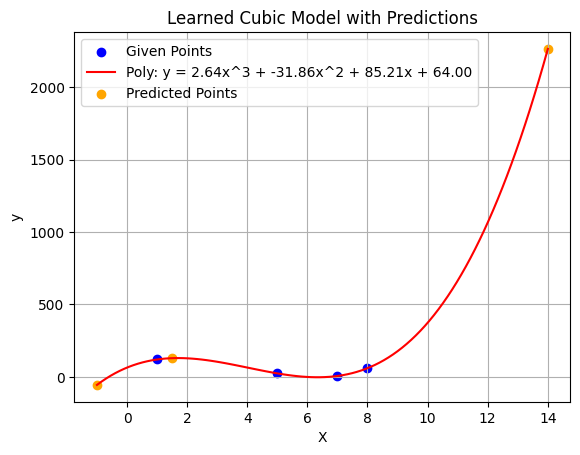

In [94]:
labels_predicted = new_inputs_design @ weights_cubic
plot_cubic_model_with_predictions(X_cubic, y_cubic, weights_cubic, new_inputs, labels_predicted)

<article class="message task"><a class="anchor" id="loading1030"></a>
    <div class="message-header">
        <span>Task 13: Observe</span>
        <span class="has-text-right">
          
          
          <i class="bi bi-lightbulb-fill"></i>
          
          <i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Compare the predictions of the cubic model with the predicitons of the quadratic models.
2. Which model is prefered in terms of representing the relationship between inputs and outputs and why?



</div></article>



In [32]:
#Write your reflection here...

## Try the same 4 points but with the quadratic model

design matrix 
 [[49  7  1]
 [25  5  1]
 [64  8  1]
 [ 1  1  1]]

weights 
 [  5.48387097 -59.76774194 175.71612903]

given points x:
 [[7 5 8 1]]
fitted labels
 [ 26.0516129   13.97419355  48.54193548 121.43225806]
actual labels
 [  6  24  60 120]


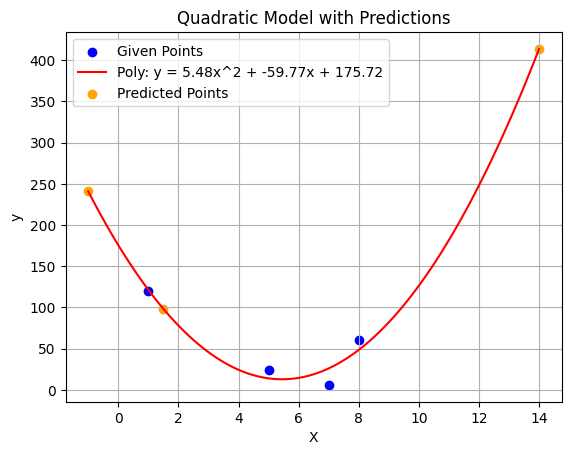

In [115]:
X_cubic_design_2ndOP = construct_design_matrix(X_cubic)
print("design matrix \n", X_cubic_design_2ndOP)

weights_cubic_2ndOP = compute_weights(X_cubic_design_2ndOP, y_cubic)
print("\nweights \n", weights_cubic_2ndOP)

new_inputs_design_2ndOP = construct_design_matrix(new_inputs.reshape(-1,1))
new_inputs_2ndOP = new_inputs.reshape(-1,1)
# print("\nnew inputs design\n", new_inputs_design_2ndOP)
print()
# print("new inputs \n", new_inputs_2ndOP)

labels_predicted_2ndOP = new_inputs_design_2ndOP @ weights_cubic_2ndOP
print("given points x:\n", X_cubic.T)
print("fitted labels\n", X_cubic_design_2ndOP @ weights_cubic_2ndOP)
print("actual labels\n", y_cubic)
plot_quadratic_model_with_predictions(X_cubic, y_cubic, weights_cubic_2ndOP, new_inputs_2ndOP, labels_predicted_2ndOP)